In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
import seaborn as sns
sns.set(palette='RdGy')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [4]:
df = pd.read_csv('Data/netflix_titles.csv')

# Exploratory data analysis

In [6]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [9]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [10]:
max(df['show_id'].value_counts())

1

# Data cleaning

### Convert 'date_added' column to datetime

In [13]:
df_datetime = df.copy()
df_datetime['date_added'] = df_datetime['date_added'].str.strip()
df_datetime['date_added'] = pd.to_datetime(df_datetime['date_added'])

### Extract year from 'date_added' as new column

In [15]:
df_datetime['year_added'] = df_datetime['date_added'].dt.year.astype('Int64')

### Extract month from 'date_added' as new column

In [17]:
df_datetime['month_added'] = df_datetime['date_added'].dt.month.astype('Int64')

### Extract day from 'date_added' as new column

In [19]:
df_datetime['day_added'] = df_datetime['date_added'].dt.day.astype('Int64')

### Convert duration to integers

In [21]:
df_duration = df_datetime.copy()

Create a new column with the unit from the 'duration' column

In [23]:
df_duration['duration_unit'] = df_duration['duration'].str.split(" ").str[1]

Create a dictionary to update the units in the 'duration_unit' column

In [25]:
duration_unit_dict = dict(zip(['min', 'Seasons', 'Season'],['minutes', 'seasons', 'seasons']))

Update the units in the 'duration_unit' column

In [27]:
df_duration = df_duration.replace({"duration_unit": duration_unit_dict})

Remove non-numerical component of 'duration' strings and convert numerical component to int

In [29]:
df_duration['duration'] = df_duration['duration'].str.split(" ").str[0].astype('Int64')

In [30]:
# df_duration['duration_unit'].unique()

In [31]:
# df_duration

Create new columns for 'minutes' (duration for movies) and 'series' (duration for TV shows) 

In [33]:
# df_duration.loc[(df_duration['type'] == 'Movie'),'minutes'] = df_duration['duration']
# df_duration.loc[(df_duration['type'] == 'TV Show'),'series'] = df_duration['duration'].astype('Int64')

Restore original 'duration' column values

In [35]:
# df_duration['duration'] = df['duration']

### Handle missing values

In [37]:
df_missing = df_duration.copy()

Create list of numerical column names

In [39]:
numerical_columns = df_missing.select_dtypes(include='number').columns

Create list of non-numerical column names

In [41]:
nonnumerical_columns = df_missing.select_dtypes(exclude='number').columns

Fill numerical missing values with the median value for the column

In [43]:
df_missing[numerical_columns] = df_missing[numerical_columns].fillna(df_missing[numerical_columns].median())

Fill non-numerical missing values with 'unknown'

In [45]:
df_missing[nonnumerical_columns] = df_missing[nonnumerical_columns].fillna("unknown")

### Cleaning categorical data

In [47]:
df_cat_clean = df_missing.copy()

Create a list of Netflix US maturity ratings

In [49]:
netflix_ratings = ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17']

Create a function to replace any ratings not on the list with 'unknown'

In [51]:
def update_rating(rating):
    if rating not in netflix_ratings:
        return 'unknown'
    else:
        return rating

Apply the function to the ratings column

In [53]:
df_cat_clean['rating'] = df_cat_clean['rating'].apply(update_rating)

### Deduping

In [55]:
df_dedupe = df_cat_clean.copy()

Show entries with duplicated descriptions

In [57]:
df_dedupe[df_dedupe.duplicated(['description'], keep = False)].sort_values(by=['description']).head(6)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,duration_unit
78,s79,Movie,Tughlaq Durbar,Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",unknown,2021-09-11 00:00:00,2020,TV-14,145,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...,2021,9,11,minutes
79,s80,Movie,Tughlaq Durbar (Telugu),Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",unknown,2021-09-11 00:00:00,2021,TV-14,145,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...,2021,9,11,minutes
7022,s7023,Movie,Hum Saath-Saath Hain,Sooraj R. Barjatya,"Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...",India,2018-01-01 00:00:00,1999,TV-G,176,"Dramas, International Movies, Music & Musicals",A scheming matriarch plots to cut off her disa...,2018,1,1,minutes
2969,s2970,Movie,Together For Eternity,Sooraj R. Barjatya,"Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...",India,2020-02-01 00:00:00,1999,TV-G,176,"Dramas, International Movies, Music & Musicals",A scheming matriarch plots to cut off her disa...,2020,2,1,minutes
3492,s3493,Movie,Oh! Baby (Malayalam),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",unknown,2019-09-25 00:00:00,2019,TV-14,146,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...,2019,9,25,minutes
3516,s3517,Movie,Oh! Baby,B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",India,2019-09-14 00:00:00,2019,TV-14,157,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...,2019,9,14,minutes


From manual checking, the following rows contain duplicate entries (as opposed to e.g. different language versions of the same film): 5965, 1652, 5964, 1270, 303, 56, 5966, 6529, 3028, 51

In [59]:
rows_to_drop = [5965, 1652, 5964, 1270, 303, 56, 5966, 6529, 3028, 51]

Drop duplicate rows

In [61]:
df_dedupe.drop(df_dedupe.index[rows_to_drop], axis=0, inplace=True)

### Renaming columns

In [63]:
df_rename = df_dedupe.copy()

Rename columns

In [65]:
df_rename.rename(columns = {'show_id':'Show ID','type':'Type','title':'Title','director':'Director','cast':'Cast',\
         'country':'Country of origin','date_added':'Date Added','release_year':'Year Released','rating':'Official Rating','duration':'Duration',\
         'listed_in':'Genres','description':'Storyline', 'year_added':'Year Added', 'month_added':'Month Added', 'day_added':'Day Added', \
                            'duration_unit':'Duration Unit'},inplace=True)

In [101]:
df_final = df_rename.copy()

# Data visualisation

### Original data

Scatter plot of release year versus duration for movies

<Axes: title={'center': 'Release year vs. duration, movies'}, xlabel='Year Released', ylabel='Duration (minutes)'>

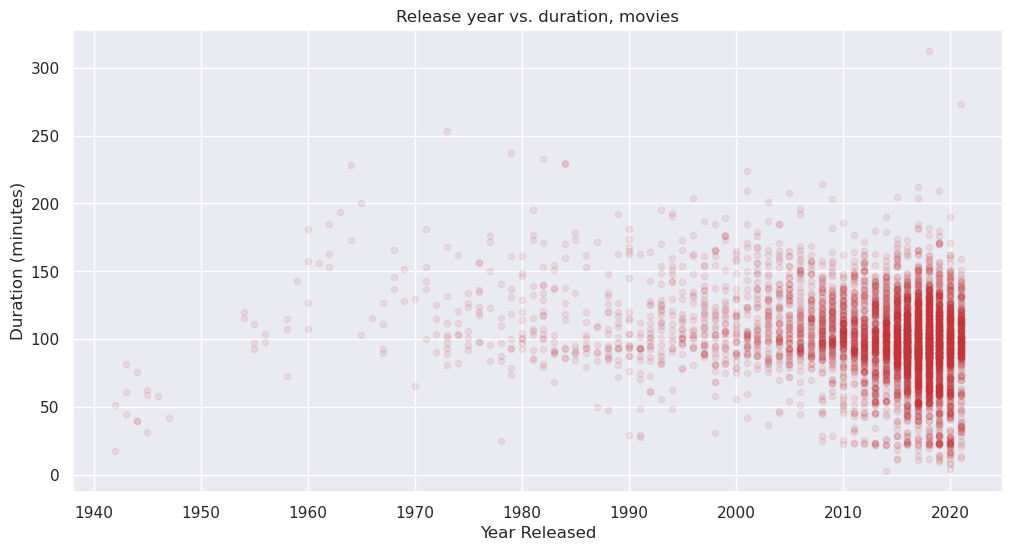

In [199]:
df_final[df_final['Type'] == 'Movie'].plot.scatter(x = 'Year Released', y = 'Duration',\
alpha = 0.1, figsize=(12,6), ylabel = "Duration (minutes)", title = 'Release year vs. duration, movies')

Scatter plot of release year versus duration for TV shows

<Axes: title={'center': 'Release year vs. no. of series, TV shows'}, xlabel='Year Released', ylabel='No. of series'>

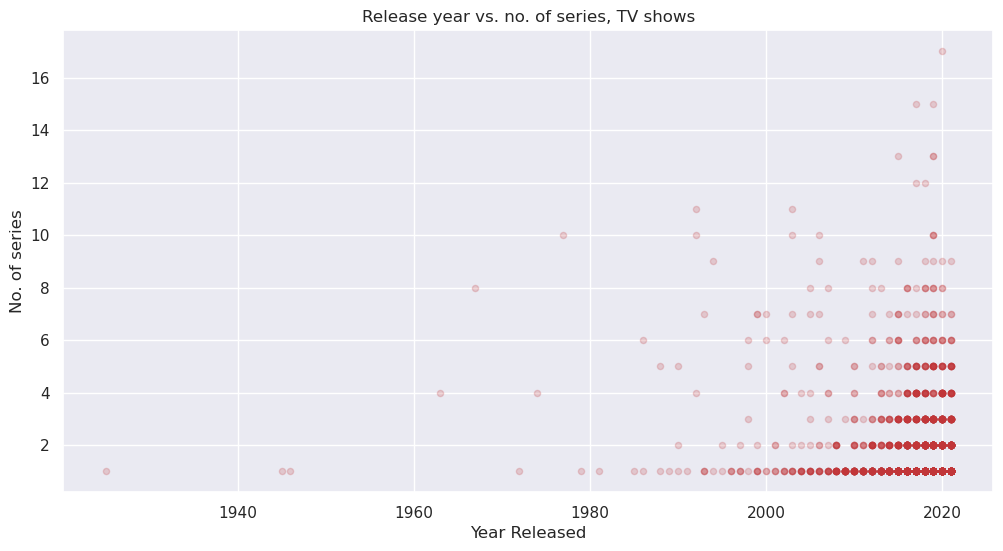

In [201]:
df_final[df_final['Type'] == 'TV Show'].plot.scatter(x = 'Year Released', y = 'Duration', \
 alpha = 0.2, figsize=(12,6), ylabel = "No. of series", title = 'Release year vs. no. of series, TV shows')

### Data restructured by genre

Create a list of unique genres, taken from the 'Genres' column

In [215]:
genre_list = df_final['Genres'].str.split(", ").explode().unique()
genre_list

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

Create a list of lists that takes each genre for each title, and writes a row starting with the genre. The result is multiple\
entries for each title (where there are multiple genres), but no duplication of titles within genres.

In [217]:
%%time
row_list = []
column_list = df_final.columns
for title in df_final['Title']:
    title_genre_list = df_final.loc[(df_final['Title'] == title),'Genres'].str.split(", ").explode()
    
    for genre in title_genre_list:
        temp_row = []
        temp_row.append(genre)
        for column in column_list:
            temp_row.append(df_final.loc[(df_final['Title'] == title),column].item())
        row_list.append(temp_row)


CPU times: user 5min 59s, sys: 717 ms, total: 6min
Wall time: 6min 18s


Convert the list of lists into a new dataframe, 'df_genre_rows', taking the column names of the original dataframe, \
plus a new initial column called 'Genre' that we can use to group by.

In [224]:
df_genre_rows = pd.DataFrame(columns = ['Genre', 'Show ID', 'Type', 'Title', 'Director', 'Cast', 'Country of origin',
       'Date Added', 'Year Released', 'Official Rating', 'Duration', 'Genres',
       'Storyline', 'Year Added', 'Month Added', 'Day Added', 'Duration Unit'], data=row_list)

In [228]:
df_genre_rows.head(3)

,Genre,Show ID,Type,Title,Director,Cast,Country of origin,Date Added,Year Released,Official Rating,Duration,Genres,Storyline,Year Added,Month Added,Day Added,Duration Unit
0,Documentaries,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25 00:00:00,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,minutes
1,International TV Shows,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,seasons
2,TV Dramas,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,seasons


An example grouping of movies by genre with median release date and duration

In [923]:
df_genre_rows[df_genre_rows['Type'] == 'Movie'].groupby(by = 'Genre')\
[['Year Released','Duration']].median().sort_values(by = 'Year Released', ascending = False)

,Year Released,Duration
Genre,,
LGBTQ Movies,2017.5,94.0
Independent Movies,2017.0,98.0
Faith & Spirituality,2017.0,105.0
Stand-Up Comedy,2017.0,65.0
Sports Movies,2017.0,95.0
Horror Movies,2017.0,95.0
Thrillers,2017.0,103.0
Documentaries,2017.0,86.0
Children & Family Movies,2017.0,87.0


An example grouping of TV shows by genre with maximum number of series

In [926]:
df_genre_rows[df_genre_rows['Type'] == 'TV Show'].groupby(by = 'Genre')\
[['Duration']].max().sort_values(by = 'Duration', ascending = False)

,Duration
Genre,
Romantic TV Shows,17
TV Dramas,17
TV Action & Adventure,15
TV Horror,15
TV Mysteries,15
Crime TV Shows,15
Classic & Cult TV,15
TV Sci-Fi & Fantasy,13
Stand-Up Comedy & Talk Shows,13


<Axes: title={'center': 'Number of TV shows by genre'}, ylabel='Genre'>

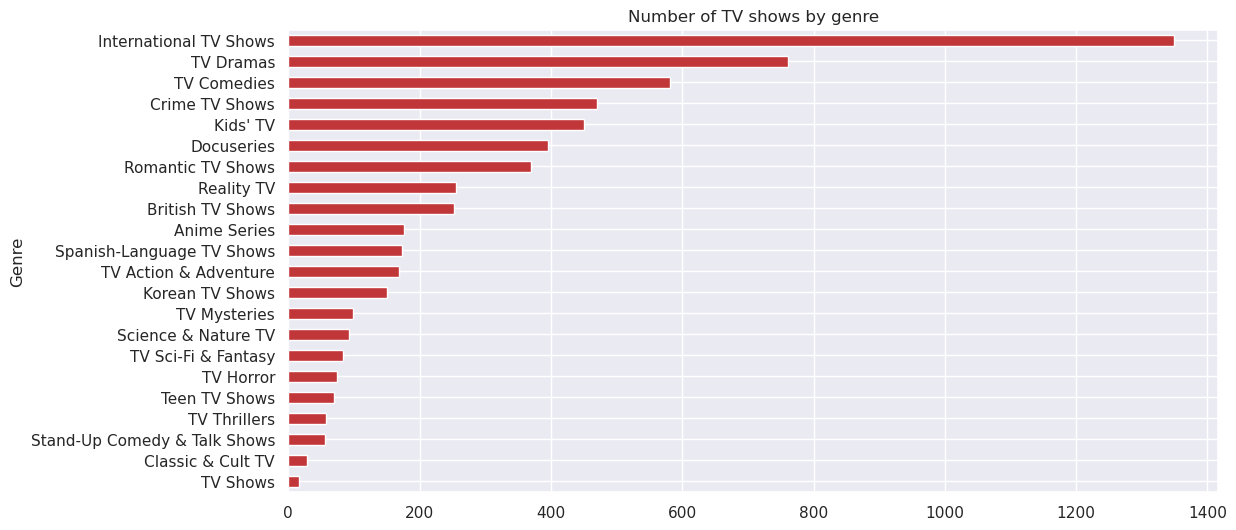

In [254]:
df_genre_rows[df_genre_rows['Type'] == 'TV Show'].groupby(by = 'Genre')\
[['Type']].count().sort_values(by = 'Type', ascending = True).plot.barh(figsize=(12,6), \
title = 'Number of TV shows by genre', legend = False)

<Axes: title={'center': 'Number of movies by genre'}, ylabel='Genre'>

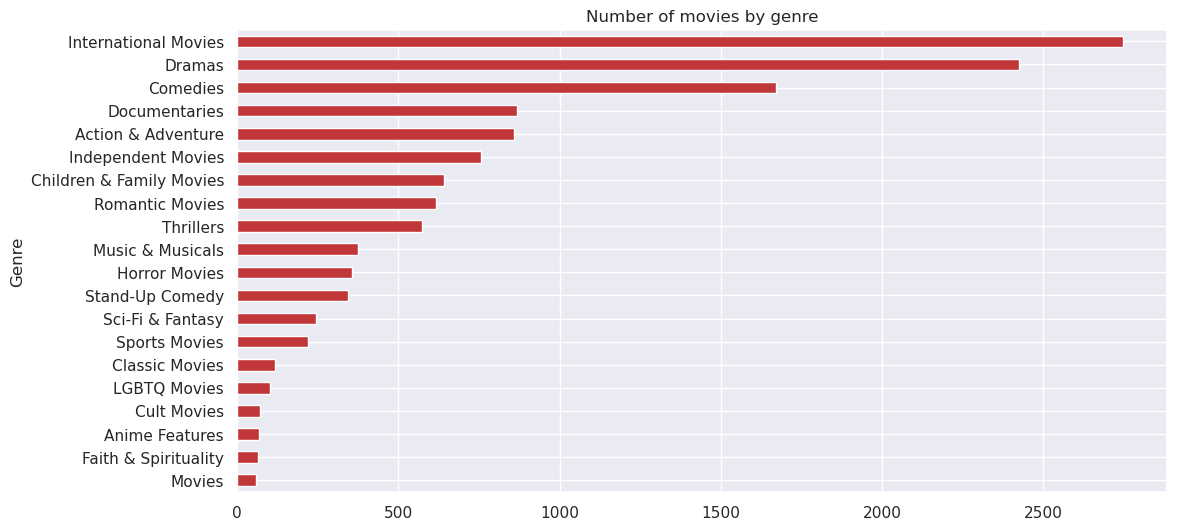

In [252]:
df_genre_rows[df_genre_rows['Type'] == 'Movie'].groupby(by = 'Genre')\
[['Type']].count().sort_values(by = 'Type', ascending = True).plot.barh(figsize=(12,6), \
title = 'Number of movies by genre', legend = False)

### Data restructured by country

In [105]:
country_list = df_final['Country of origin'].str.split(", ").explode().unique()
country_list

array(['United States', 'South Africa', 'unknown', 'India', 'Ghana',
       'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia',
       'Czech Republic', 'Mexico', 'Turkey', 'Australia', 'France',
       'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain',
       'Belgium', 'South Korea', 'Singapore', 'Italy', 'Romania',
       'Argentina', 'Venezuela', 'Hong Kong', 'Russia', '', 'Ireland',
       'Nepal', 'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark',
       'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary',
       'Sweden', 'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'United Kingdom,', 'Kenya',
       'Chile', 'Luxembourg', 'Cambodia', 'Bangladesh', 'Portugal',
       'Cayman Islands', 'Senegal', 'S

In [109]:
%%time
c_row_list = []
column_list = df_final.columns
for title in df_final['Title']:
    title_country_list = df_final.loc[(df_final['Title'] == title),'Country of origin'].str.split(", ").explode()
    
    for genre in title_country_list:
        temp_row = []
        temp_row.append(genre)
        for column in column_list:
            temp_row.append(df_final.loc[(df_final['Title'] == title),column].item())
        c_row_list.append(temp_row)


CPU times: user 2min 28s, sys: 295 ms, total: 2min 28s
Wall time: 2min 31s


In [117]:
df_country_rows = pd.DataFrame(columns = ['Country', 'Show ID', 'Type', 'Title', 'Director', \
                                          'Cast', 'Country of origin',
       'Date Added', 'Year Released', 'Official Rating', 'Duration', 'Genres',
       'Storyline', 'Year Added', 'Month Added', 'Day Added', 'Duration Unit'], data=c_row_list)

In [230]:
df_country_rows.head(3)

,Country,Show ID,Type,Title,Director,Cast,Country of origin,Date Added,Year Released,Official Rating,Duration,Genres,Storyline,Year Added,Month Added,Day Added,Duration Unit
0,United States,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25 00:00:00,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,minutes
1,South Africa,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,seasons
2,unknown,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24 00:00:00,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,seasons


<Axes: title={'center': 'Films per country, top 30'}, ylabel='Country'>

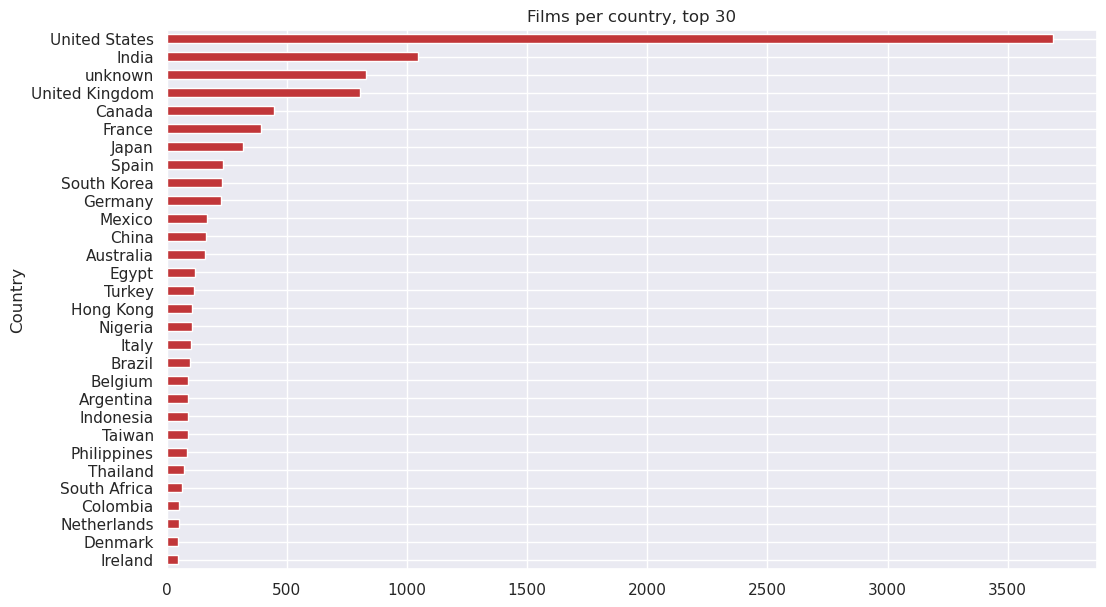

In [274]:
df_country_rows.groupby(by = 'Country')\
[['Type']].count().sort_values(by = 'Type', ascending = True).tail(30).plot.barh(figsize=(12,7), \
title = 'Films per country, top 30', legend = False)

,Type
Country,
United States,3687
India,1045
unknown,829
United Kingdom,804
Canada,445
...,...
Mongolia,1
Somalia,1
Ethiopia,1
